# Name : Yunhu Kim
# Student ID : 2018120195
# GitHub : https://github.com/yunhu0110/assignment01

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# least square approximation : $ \hat{x}=(A^{\rm T}A)^{-1}A^{\rm T}b$

In [24]:
def lsApproximation(vecX,vecY) :
    xTx= np.dot(vecX.T,vecX)
    middle=np.dot(np.linalg.inv(xTx),vecX.T)
    weight=np.dot(middle,vecY)
    return (weight)

# Random Matrix

In [25]:
def Matrixx(n) :
    R=[]
    
    for i in range(n):
        r = np.random.normal(0, 1, 784)
        R.append(r)
    
    R=np.array(R)
    R_T=R.T
    return (R_T)
    

# F1 Score

In [26]:
def predict(A_test,weight,list_label_test) :
    # yHat은 추정치
    yHat=np.dot(A_test,weight)

    # sign function 적용
    yHat[yHat<0]=-1
    yHat[yHat>0]=1

    TrueP=np.logical_and((yHat==1),(list_label_test==1))
    FalseP=np.logical_and((yHat==1),(list_label_test==-1))
    TrueN=np.logical_and((yHat==-1),(list_label_test==-1))
    FalseN=np.logical_and((yHat==-1),(list_label_test==1))

    precision=np.sum(TrueP)/(np.sum(TrueP)+np.sum(FalseP))
    recall=np.sum(TrueP)/(np.sum(FalseN)+np.sum(TrueP))
    F1_score=2*precision*recall/(precision+recall)

    return(F1_score)

# Mnist dataset

In [27]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images



# Distance ,Normalize

In [28]:

def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)


def distance(vecx, vecy):

    d = (vecx - vecy) ** 2
    s = np.sum(d)

    return(s)

In [29]:

list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1


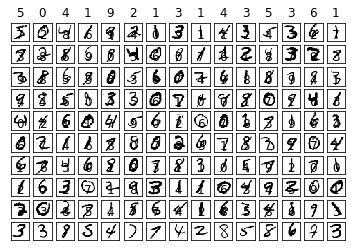

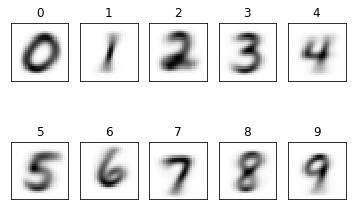

In [9]:

f1 = plt.figure(1)

for i in range(150):

    label       = list_label_train[i]
    im_vector   = list_image_train[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_train):

    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# Evaluation

In [38]:

list_label_train=list_label_train.reshape(60000,1)

list_label_train[list_label_train!=0]=-1

list_label_train[list_label_train==0]=1

weight1=lsApproximation(A1,list_label_train)
weight2=lsApproximation(A2,list_label_train)
weight3=lsApproximation(A3,list_label_train)
weight4=lsApproximation(A4,list_label_train)

In [39]:

list_image_test_T=list_image_test.T

A1_test=np.matmul(list_image_test_T,R1)
A2_test=np.matmul(list_image_test_T,R2)
A3_test=np.matmul(list_image_test_T,R3)
A4_test=np.matmul(list_image_test_T,R4)


list_label_test=list_label_test.reshape(10000,1)

list_label_test[list_label_test!=0]=-1
list_label_test[list_label_test==0]=1

In [41]:

F1_score1=predict(A1_test,weight1,list_label_test)
F1_score2=predict(A2_test,weight2,list_label_test)
F1_score3=predict(A3_test,weight3,list_label_test)
F1_score4=predict(A4_test,weight4,list_label_test)

print("F1_score1=",F1_score1,"F1_score2=",F1_score2,"F1_score3=",F1_score3,"F1_score4=",F1_score4)

F1_score1= nan F1_score2= nan F1_score3= nan F1_score4= nan


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


# Plot image

In [33]:

yHat=np.dot(A4_test,weight4)


yHat[yHat<0]=-1
yHat[yHat>0]=1

TP=np.logical_and((yHat==1),(list_label_test==1))
FP=np.logical_and((yHat==1),(list_label_test==-1))
TN=np.logical_and((yHat==-1),(list_label_test==-1))
FN=np.logical_and((yHat==-1),(list_label_test==1))


TP_IDX=(TP.T).ravel()
FP_IDX=(FP.T).ravel()
TN_IDX=(TN.T).ravel()
FN_IDX=(FN.T).ravel()



im_test_TP=np.average(list_image_test_T[TP_IDX],axis=0)
im_test_FP=np.average(list_image_test_T[FP_IDX],axis=0)
im_test_TN=np.average(list_image_test_T[TN_IDX],axis=0)
im_test_FN=np.average(list_image_test_T[FN_IDX],axis=0)



# True Positive

(-0.5, 27.5, 27.5, -0.5)

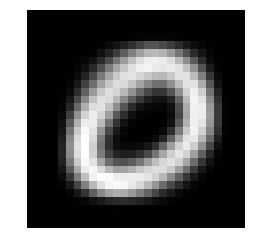

In [34]:
im_test_TP=im_test_TP.reshape((28,28))
plt.imshow(im_test_TP,cmap='gray')
plt.axis('off')

# False Positive

(-0.5, 27.5, 27.5, -0.5)

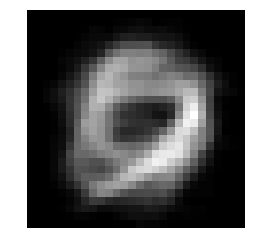

In [35]:
im_test_FP=im_test_FP.reshape((28,28))
plt.imshow(im_test_FP,cmap='gray')
plt.axis('off')

# True Negative

(-0.5, 27.5, 27.5, -0.5)

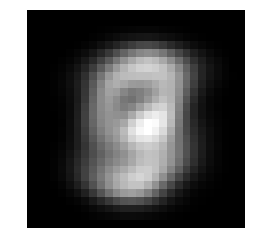

In [36]:
im_test_TN=im_test_TN.reshape((28,28))
plt.imshow(im_test_TN,cmap='gray')
plt.axis('off')

# False Negative

(-0.5, 27.5, 27.5, -0.5)

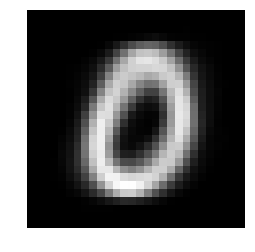

In [37]:
im_test_FN=im_test_FN.reshape((28,28))
plt.imshow(im_test_FN,cmap='gray')
plt.axis('off')